## 第一章：数据结构与算法
### 解压可迭代对象赋值给多个变量
利用*星号表达式拆解列表

In [2]:
#排除首尾
def drop_first_last(grades):
    first, *middle, last = grades
    return avg(middle)

In [6]:
#星号解压语法在字符串操作的时候也会很有用，比如字符串的分割。
line = 'nobody:*:-2:-2:Unprivileged User:/var/empty:/usr/bin/false'
uname, *fields, homedir, sh = line.split(':')
uname,homedir,sh

('nobody', '/var/empty', '/usr/bin/false')

### 保留最后 N 个元素
使用 deque(maxlen=N) 构造函数会新建一个固定大小的队列。当新的元素加入并且这个队列已满的时候， 最老的元素会自动被移除掉。

In [11]:
from collections import deque
q = deque(maxlen=3)
q.append(1)
q.append(1)
q.append(1)
print(q)
q.append(4)
print(q)

deque([1, 1, 1], maxlen=3)
deque([1, 1, 4], maxlen=3)


### 查找最大或最小的 N 个元素
heapq 模块有两个函数：nlargest() 和 nsmallest() 可以完美解决这个问题。

In [1]:
import heapq
nums = [1, 8, 2, 23, 7, -4, 18, 23, 42, 37, 2]
print(heapq.nlargest(3, nums)) # Prints [42, 37, 23]
print(heapq.nsmallest(3, nums)) # Prints [-4, 1, 2]

[42, 37, 23]
[-4, 1, 2]


In [2]:
portfolio = [
    {'name': 'IBM', 'shares': 100, 'price': 91.1},
    {'name': 'AAPL', 'shares': 50, 'price': 543.22},
    {'name': 'FB', 'shares': 200, 'price': 21.09},
    {'name': 'HPQ', 'shares': 35, 'price': 31.75},
    {'name': 'YHOO', 'shares': 45, 'price': 16.35},
    {'name': 'ACME', 'shares': 75, 'price': 115.65}
]
cheap = heapq.nsmallest(3, portfolio, key=lambda s: s['price'])
expensive = heapq.nlargest(3, portfolio, key=lambda s: s['price'])
print(cheap)
print(expensive)

[{'name': 'YHOO', 'shares': 45, 'price': 16.35}, {'name': 'FB', 'shares': 200, 'price': 21.09}, {'name': 'HPQ', 'shares': 35, 'price': 31.75}]
[{'name': 'AAPL', 'shares': 50, 'price': 543.22}, {'name': 'ACME', 'shares': 75, 'price': 115.65}, {'name': 'IBM', 'shares': 100, 'price': 91.1}]


### 字典中的键映射多个值
怎样实现一个键对应多个值的字典（也叫 multidict）？
选择使用列表还是集合取决于你的实际需求。如果你想保持元素的插入顺序就应该使用列表， 如果想去掉重复元素就使用集合（并且不关心元素的顺序问题）。

In [12]:
d = {
    'a' : [1, 2, 3],
    'b' : [4, 5]
}
e = {
    'a' : {1, 2, 3},
    'b' : {4, 5}
}

# 创建起来可能比较麻烦
pairs={(1,2)}
d = {}
for key, value in pairs:
    if key not in d:
        d[key] = []
    d[key].append(value)

你可以很方便的使用 collections 模块中的 defaultdict 来构造这样的字典。 defaultdict 的一个特征是它会自动初始化每个 key 刚开始对应的值，所以你只需要关注添加元素操作了。比如：

In [13]:
from collections import defaultdict

d = defaultdict(list)
d['a'].append(1)
d['a'].append(2)
d['b'].append(4)

d = defaultdict(set)
d['a'].add(1)
d['a'].add(2)
d['b'].add(4)

#创建会简单一些
pairs={(1,2)}
d = defaultdict(list)
for key, value in pairs:
    d[key].append(value)

### 字典的运算
#### 问题
怎样在数据字典中执行一些计算操作（比如求最小值、最大值、排序等等）？

#### 解决方案
考虑下面的股票名和价格映射字典

In [16]:
prices = {
    'ACME': 45.23,
    'AAPL': 612.78,
    'IBM': 205.55,
    'HPQ': 37.20,
    'FB': 10.75
}

#如果只需要键的值，可以使用lambda表达式
min(prices, key=lambda k: prices[k]) # Returns 'FB'
max(prices, key=lambda k: prices[k]) # Returns 'AAPL'
#需要值的话，需要再执行一次查找操作
min_value = prices[min(prices, key=lambda k: prices[k])]
#所以使用zip对字典翻转可以解决这个问题

#为了对字典值执行计算操作，通常需要使用 zip() 函数先将键和值反转过来
min_price = min(zip(prices.values(), prices.keys()))
# min_price is (10.75, 'FB')
max_price = max(zip(prices.values(), prices.keys()))
# max_price is (612.78, 'AAPL')


#类似的，可以使用 zip() 和 sorted() 函数来排列字典数据：
prices_sorted = sorted(zip(prices.values(), prices.keys()))

#执行这些计算的时候，需要注意的是 zip() 函数创建的是一个只能访问一次的迭代器。 比如，下面的代码就会产生错误：
prices_and_names = zip(prices.values(), prices.keys())
print(min(prices_and_names)) # OK
print(max(prices_and_names)) # ValueError: max() arg is an empty sequence

(10.75, 'FB')


ValueError: max() arg is an empty sequence

### 查找两字典的相同点
怎样在两个字典中寻寻找相同点（比如相同的键、相同的值等等）？

In [18]:
a = {
    'x' : 1,
    'y' : 2,
    'z' : 3
}

b = {
    'w' : 10,
    'x' : 11,
    'y' : 2
}

# Find keys in common
a.keys() & b.keys() # { 'x', 'y' }
# Find keys in a that are not in b
a.keys() - b.keys() # { 'z' }
# Find (key,value) pairs in common
a.items() & b.items() # { ('y', 2) }

#这些操作也可以用于修改或者过滤字典元素。 比如，假如你想以现有字典构造一个排除几个指定键的新字典。 下面利用字典推导来实现这样的需求：
# Make a new dictionary with certain keys removed
c = {key:a[key] for key in a.keys() - {'z', 'w'}}
# c is {'x': 1, 'y': 2}

### 从字典中提取子集
#### 问题
你想构造一个字典，它是另外一个字典的子集。

#### 解决方案
最简单的方式是使用字典推导。比如：

In [19]:
prices = {
    'ACME': 45.23,
    'AAPL': 612.78,
    'IBM': 205.55,
    'HPQ': 37.20,
    'FB': 10.75
}
# Make a dictionary of all prices over 200
p1 = {key: value for key, value in prices.items() if value > 200}
# Make a dictionary of tech stocks
tech_names = {'AAPL', 'IBM', 'HPQ', 'MSFT'}
p2 = {key: value for key, value in prices.items() if key in tech_names}

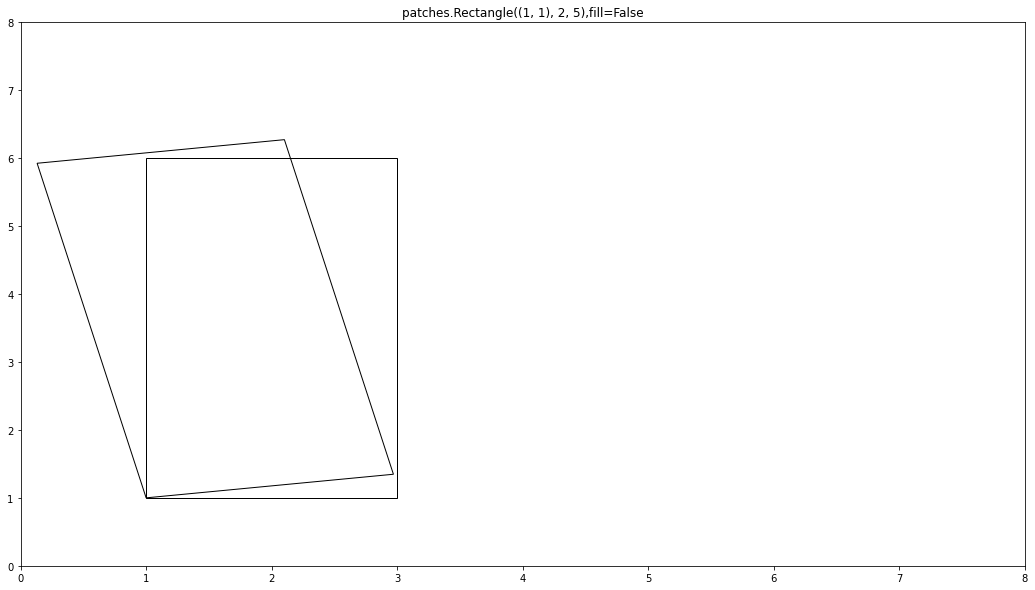